In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import Normalizer

In [2]:
d=pd.read_csv('data.csv')
print(d.shape)

(11500, 180)


In [3]:
d.head(10)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,5
5,X14.V1.56,55,28,18,16,16,19,25,40,52,66,81,98,111,122,105,85,66,51,34,19,16,8,-5,-21,-18,-14,3,27,46,57,60,51,35,22,20,28,28,35,43,...,-4,-17,-30,-45,-71,-81,-78,-69,-60,-45,-33,-25,-14,-2,3,-5,-18,-39,-61,-73,-77,-76,-79,-64,-40,-25,0,9,12,-6,-12,-31,-42,-54,-60,-64,-60,-56,-55,5
6,X3.V1.191,-55,-9,52,111,135,129,103,72,37,0,-38,-77,-113,-128,-121,-105,-71,-27,13,44,60,64,40,30,25,28,34,31,18,-19,-53,-76,-81,-74,-57,-36,-21,12,55,...,94,109,107,88,52,5,-24,-37,-50,-58,-66,-65,-60,-45,-20,1,23,50,74,99,125,141,129,95,41,-21,-77,-117,-135,-137,-125,-99,-79,-62,-41,-26,11,67,128,4
7,X11.V1.273,1,-2,-8,-11,-12,-17,-15,-16,-18,-17,-19,-18,-16,-15,-14,-21,-19,-24,-24,-24,-17,-20,-23,-15,-17,-20,-18,-19,-20,-19,-18,-20,-25,-27,-24,-22,-20,-9,0,...,-20,-26,-24,-25,-35,-41,-41,-53,-61,-58,-59,-55,-53,-65,-78,-87,-97,-100,-106,-104,-107,-110,-110,-109,-104,-118,-111,-102,-80,-67,-79,-91,-97,-88,-76,-72,-66,-57,-39,2
8,X19.V1.874,-278,-246,-215,-191,-177,-167,-157,-139,-118,-92,-63,-39,-11,14,36,60,70,78,79,69,27,-45,-123,-183,-218,-242,-256,-256,-236,-205,-165,-125,-84,-41,-10,12,35,58,71,...,74,79,81,76,65,63,62,65,67,70,63,45,20,-11,-32,-26,3,40,85,124,182,248,349,418,419,291,73,-152,-311,-386,-400,-379,-336,-281,-226,-174,-125,-79,-40,1
9,X3.V1.491,8,15,13,3,-6,-8,-5,4,25,41,48,44,34,16,-2,-11,-24,11,33,43,48,42,33,14,-1,-7,-17,-36,-59,-74,-88,-84,-64,-37,-8,24,47,49,42,...,39,29,12,-8,-10,-13,-12,-7,1,3,6,13,12,7,0,2,2,15,28,27,18,2,-5,-6,13,41,66,72,68,65,49,31,11,-5,-17,-19,-15,-15,-11,4


##Data Transformation and Normalization


##Balanced Dataset

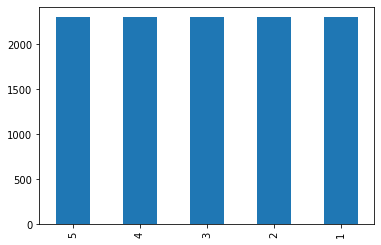

In [4]:
d['y'].value_counts().plot(kind='bar');

In [5]:
d.rename(columns={ d.columns[0]: "Index" }, inplace = True)
#d = d.set_index(d['Index'])
#d.drop('Index',axis='columns',inplace=True)

##Saumya Dataset


In [ ]:
ds=d

##Features

In [6]:
y=d.y
d.drop(columns='y')
d.iloc[:,1:] = Normalizer(norm='l1').fit_transform(d.iloc[:,1:])
d['y']=y

In [7]:
d['y']=d['y'].astype(int)
d_e=d[d["y"]==1]
d_ne=d[d["y"]!=1]

In [10]:
d_e.shape

(2300, 180)

(array([[ 0.,  0., 16., ...,  0.,  0.,  0.],
        [ 0.,  0.,  8., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  3., ...,  0.,  0.,  0.],
        [ 0.,  0.,  9., ...,  0.,  0.,  0.],
        [ 0.,  0.,  7., ...,  0.,  0.,  0.]]),
 array([-0.04978339, -0.03779219, -0.02580099, -0.01380979, -0.00181859,
         0.01017261,  0.02216381,  0.03415501,  0.04614621,  0.05813741,
         0.07012861]),
 <a list of 2300 Lists of Patches objects>)

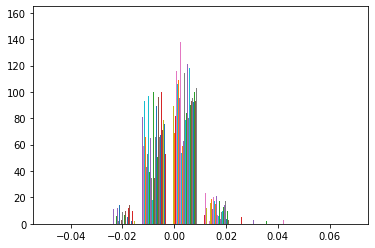

In [ ]:
matrix=d_e.iloc[:,1:179]
plt.hist(matrix)

(array([[0., 0., 3., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-0.05184219, -0.04054031, -0.02923842, -0.01793654, -0.00663466,
         0.00466723,  0.01596911,  0.027271  ,  0.03857288,  0.04987476,
         0.06117665]),
 <a list of 9200 Lists of Patches objects>)

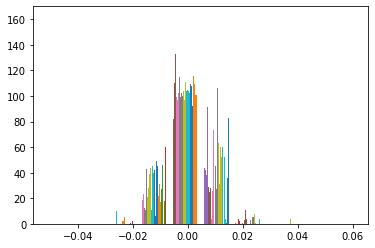

In [ ]:
matrix2=d_ne.iloc[:,1:179]
plt.hist(matrix2)

In [11]:
d.drop('y',axis='columns',inplace=True)

In [12]:
df=pd.DataFrame()
df['skew']=d.skew(axis = 1, skipna = True) 
df['mean']=d.mean(axis = 1, skipna = True)
df['kurtosis']=d.kurtosis(axis = 1, skipna = True) 
df['variance']=d.var(axis = 1, skipna = True) 
df['min']=d.min(axis = 1, skipna = True) 
df['max']=d.max(axis = 1, skipna = True) 
#df['range']=d.range(axis = 1, skipna = True) 
df['mad']=d.iloc[:,1:179].mad(axis=1)
df['y']=y
d1=pd.DataFrame()
d1=d.T

##Freq Data

In [26]:
freq_de=pd.DataFrame()
freq_dne=pd.DataFrame()
from scipy import fftpack
SR=178
N=(1-0)*SR
frequency = np.linspace (0.0, 89, int (N/2))
freq_de =pd.DataFrame(fftpack.fft(d_e.iloc[0:2300,1:179]))
freq_dne =pd.DataFrame(fftpack.fft(d_ne.iloc[0:9200,1:179]))
#y_axis = 2/N * np.abs (freq_d [0:np.int (N/2)])
freq_de=freq_de.applymap(np.absolute)
freq_dne=freq_dne.applymap(np.absolute)

In [ ]:
d_e=d_e.T
d_ne=d_ne.T

In [102]:
freq_de=freq_de.T
freq_dne=freq_dne.T

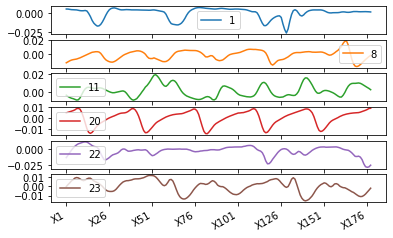

In [94]:
d_e.iloc[1:179,0:6].plot(subplots=True)
plt.show()

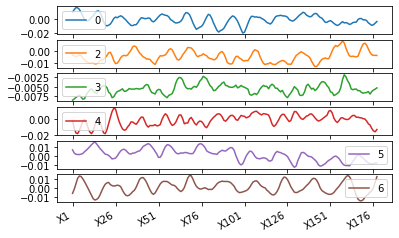

In [96]:
d_ne.iloc[1:179,0:6].plot(subplots=True)
plt.show()

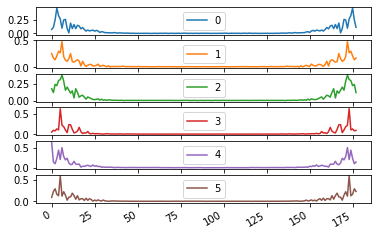

In [103]:
freq_de.iloc[0:178,0:6].plot(subplots=True)
plt.show()

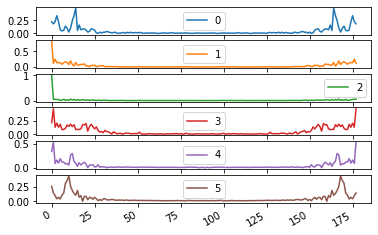

In [104]:
freq_dne.iloc[0:178,0:6].plot(subplots=True)
plt.show()

Splitting Data for BOX Plots


In [ ]:
dfe=pd.DataFrame
dfne=pd.DataFrame
dfe=d[df["y"]==1]
dfne=d[df["y"]!=1]
boxplot = dfe.boxplot(column=['min','max','mean','mad','variance'])
boxplot = dfne.boxplot(column=['min','max','mean','mad','variance'])

###Peaks

In [ ]:
d_train=pd.DataFrame
d_train=d
d_train['skew']= df['skew']
d_train['mean']= df['mean']
d_train['kurtosis']= df['kurtosis']
d_train['variance']= df['variance']
d_train['min']= df['min']
d_train['max']= df['max']
d_train['mad']= df['mad']
d.shape

(11500, 186)

In [ ]:
X = df.iloc[:,:7].values
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

'''
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)


# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors =5 , metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)


# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
'''
classifier = XGBClassifier(booster='gbtree',n_estimators=100) 
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 41.45%


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X_test, y_test, cv=5, scoring='accuracy')
scores

array([0.3942029 , 0.41449275, 0.39710145, 0.38405797, 0.38695652])

In [ ]:
cm

array([[479,  24,  58,  94,  36],
       [109, 118, 188, 173,  96],
       [117,  80, 233, 137,  90],
       [ 76,  28,  81, 382, 118],
       [ 69,  59,  88, 299, 218]])

In [ ]:
df.corr(method ='kendall') 

,skew,mean,kurtosis,variance,min,max,mad,y
skew,1.000000,0.022698,-0.045909,-0.039933,0.383031,0.307173,-0.034266,0.045749
mean,0.022698,1.000000,-0.000151,0.204519,0.243220,0.468826,0.222040,-0.046239
kurtosis,-0.045909,-0.000151,1.000000,0.281350,-0.303568,0.230129,-0.008392,-0.008267
variance,-0.039933,0.204519,0.281350,1.000000,-0.326527,0.412594,0.663673,-0.152436
min,0.383031,0.243220,-0.303568,-0.326527,1.000000,0.095190,-0.182291,-0.006007
max,0.307173,0.468826,0.230129,0.412594,0.095190,1.000000,0.289131,0.019075
mad,-0.034266,0.222040,-0.008392,0.663673,-0.182291,0.289131,1.000000,-0.182827
y,0.045749,-0.046239,-0.008267,-0.152436,-0.006007,0.019075,-0.182827,1.000000


In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
precision_test, recall_test, fscore_test, support_test = score(y_test, y_pred)
print(precision_score, precision_test, recall_test)
print(fscore_test)

In [ ]:
'''
plotd=pd.DataFrame
plotd=d.iloc[:11500,1:179]
#os.chdir("figs1")
c=1
for i in plotd.index:
  print(c)
  signal=pd.Series((plotd.iloc[i,1:179]))
  time = pd.Series(list(range(1, 179)))
  dplot=pd.DataFrame(signal)
  to_append = time
  df_length = len(dplot)
  dplot.loc[df_length] = to_append
  fig=dplot.plot().get_figure()
  fig.savefig("df"+str(c)+".jpg")
  c=c+1
  os.chdir("..")
  os.chdir("..")
'''

In [ ]:
plotd=pd.DataFrame()
plotd=d.iloc[:11500,1:179]
#plotd.head(5)
plotd1=plotd

In [ ]:
time = list(range(1, 179))
to_append = time
df_length = len(plotd1)
plotd1.loc[df_length] = to_append

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178]


In [53]:
freq_de.iloc[0:1,0:178]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177
0,0.07484,0.112456,0.248675,0.466751,0.329115,0.265278,0.096717,0.248364,0.258185,0.090711,0.011671,0.191157,0.090165,0.164255,0.089409,0.150494,0.136897,0.084556,0.109379,0.072129,0.044042,0.063085,0.046758,0.054975,0.06193,0.041915,0.05722,0.044905,0.018464,0.033981,0.026761,0.015504,0.015127,0.012555,0.012979,0.009684,0.015024,0.015427,0.006273,0.010446,...,0.011664,0.010446,0.006273,0.015427,0.015024,0.009684,0.012979,0.012555,0.015127,0.015504,0.026761,0.033981,0.018464,0.044905,0.05722,0.041915,0.06193,0.054975,0.046758,0.063085,0.044042,0.072129,0.109379,0.084556,0.136897,0.150494,0.089409,0.164255,0.090165,0.191157,0.011671,0.090711,0.258185,0.248364,0.096717,0.265278,0.329115,0.466751,0.248675,0.112456
